Rozmiar obrazu: (533, 800)
Wykonywanie rozkładu SVD...
Liczba wartości singularnych: 533
Największe wartości singularne: [85625.89739218 17445.15146466 15524.06526921 14709.08624007
 12283.32313768]

WYNIKI:
Liczba wartości singularnych dla 90% informacji: 4
Dokładny procent energii dla k=4: 91.92%
Stopień kompresji: 79.91x


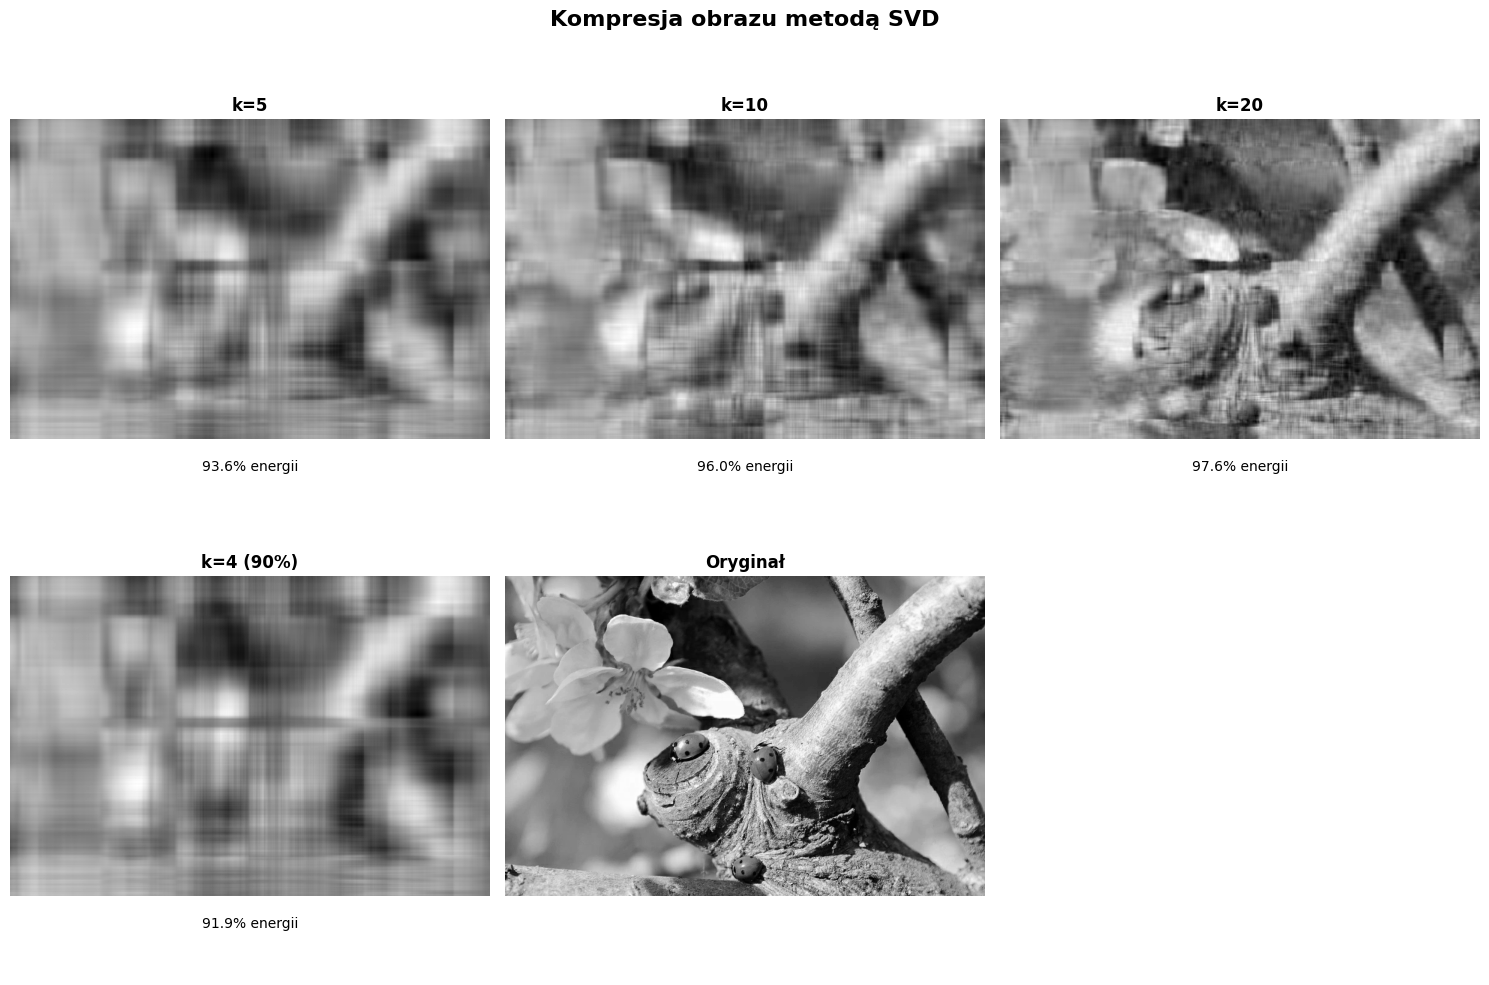

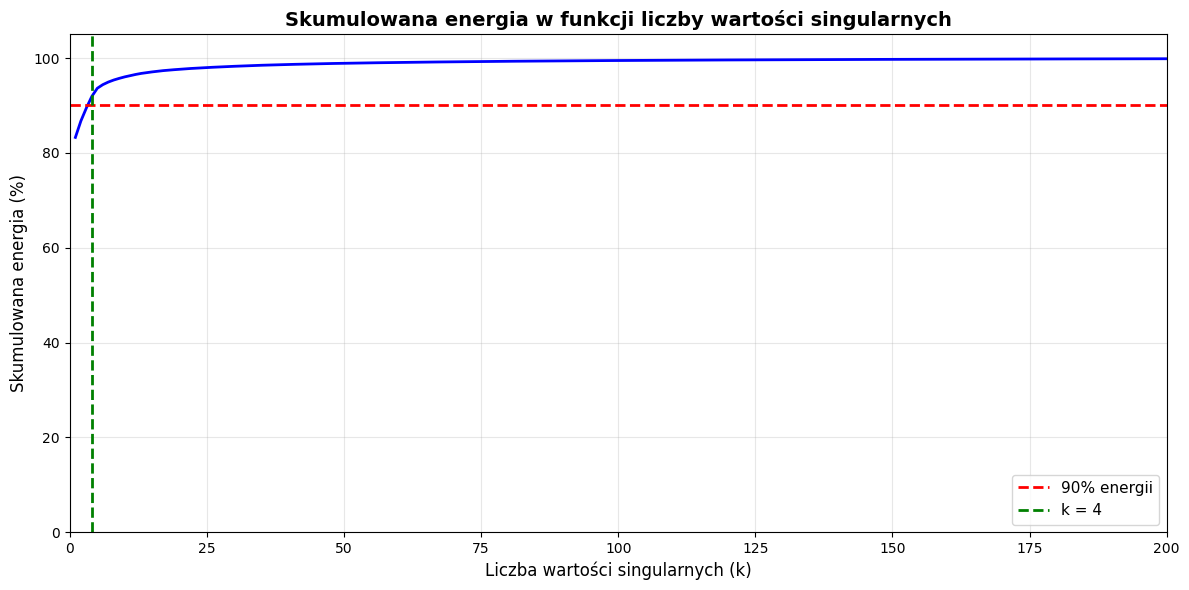


TABELA: Energia dla wybranych wartości k
k          Energia (%)     Stopień kompresji   
------------------------------------------------------------
5          93.63           63.93               x
10         96.03           31.96               x
20         97.63           15.98               x
50         98.90           6.39                x
4          91.92           79.91               x
533        100.00          0.60                x


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from io import BytesIO
import requests

# Wczytanie obrazu
img = Image.open('14.webp').convert('L')  # L = grayscale

# Konwersja do macierzy numpy
A = np.array(img, dtype=float)
print(f"Rozmiar obrazu: {A.shape}")

# Wykonanie rozkładu SVD
print("Wykonywanie rozkładu SVD...")
U, sigma, Vt = np.linalg.svd(A, full_matrices=False)

print(f"Liczba wartości singularnych: {len(sigma)}")
print(f"Największe wartości singularne: {sigma[:5]}")

# Obliczanie energii
energia = sigma ** 2
energia_calkowita = np.sum(energia)

# Obliczanie skumulowanej energii
energia_skumulowana = np.cumsum(energia)
procent_energii = energia_skumulowana / energia_calkowita

# Znajdowanie liczby wartości singularnych dla 90% informacji
k_90 = np.argmax(procent_energii >= 0.90) + 1

print(f"\n{'='*60}")
print(f"WYNIKI:")
print(f"{'='*60}")
print(f"Liczba wartości singularnych dla 90% informacji: {k_90}")
print(f"Dokładny procent energii dla k={k_90}: {procent_energii[k_90-1]*100:.2f}%")
print(f"Stopień kompresji: {A.shape[0] * A.shape[1] / (k_90 * (A.shape[0] + A.shape[1] + 1)):.2f}x")

# Rekonstrukcja obrazu z k wartościami singularnymi
def rekonstrukcja_svd(U, sigma, Vt, k):
    """Rekonstruuje obraz używając k pierwszych wartości singularnych"""
    return U[:, :k] @ np.diag(sigma[:k]) @ Vt[:k, :]

# Tworzenie rekonstrukcji
wartosci_k = [5, 10, 20, k_90, len(sigma)]
etykiety = ['k=5', 'k=10', 'k=20', f'k={k_90} (90%)', 'Oryginał']

# Wizualizacja
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Kompresja obrazu metodą SVD', fontsize=16, fontweight='bold')

for idx, (k, label) in enumerate(zip(wartosci_k, etykiety)):
    row = idx // 3
    col = idx % 3
    
    if k == len(sigma):
        img_rec = A  # Oryginał
    else:
        img_rec = rekonstrukcja_svd(U, sigma, Vt, k)
    
    axes[row, col].imshow(img_rec, cmap='gray')
    axes[row, col].set_title(label, fontsize=12, fontweight='bold')
    axes[row, col].axis('off')
    
    if k != len(sigma):
        procent = procent_energii[k-1] * 100
        axes[row, col].text(0.5, -0.1, f'{procent:.1f}% energii', 
                           ha='center', transform=axes[row, col].transAxes)

# Ukrycie ostatniego (pustego) subplot
axes[1, 2].axis('off')

plt.tight_layout()
plt.show()

# Wykres skumulowanej energii
plt.figure(figsize=(12, 6))
plt.plot(range(1, len(procent_energii)+1), procent_energii * 100, 'b-', linewidth=2)
plt.axhline(y=90, color='r', linestyle='--', linewidth=2, label='90% energii')
plt.axvline(x=k_90, color='g', linestyle='--', linewidth=2, label=f'k = {k_90}')
plt.xlabel('Liczba wartości singularnych (k)', fontsize=12)
plt.ylabel('Skumulowana energia (%)', fontsize=12)
plt.title('Skumulowana energia w funkcji liczby wartości singularnych', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.legend(fontsize=11)
plt.xlim(0, min(200, len(sigma)))
plt.ylim(0, 105)
plt.tight_layout()
plt.show()

# Tabela z wybranymi wartościami k
print(f"\n{'='*60}")
print("TABELA: Energia dla wybranych wartości k")
print(f"{'='*60}")
print(f"{'k':<10} {'Energia (%)':<15} {'Stopień kompresji':<20}")
print(f"{'-'*60}")
for k in [5, 10, 20, 50, k_90, len(sigma)]:
    if k <= len(sigma):
        energia_proc = procent_energii[k-1] * 100
        kompresja = A.shape[0] * A.shape[1] / (k * (A.shape[0] + A.shape[1] + 1))
        print(f"{k:<10} {energia_proc:<15.2f} {kompresja:<20.2f}x")
print(f"{'='*60}")